In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train_df = pd.read_csv('data/train.csv')

In [4]:
test_df = pd.read_csv('data/test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [6]:
print("Features:", train_df.shape[1])
print("Training Examples:", train_df.shape[0])

Features: 17
Training Examples: 360336


EDA


In [7]:
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette("hls", 8)

In [8]:
train_df.drop('id', axis = 1, inplace = True)
test_df = test_df.drop('id', axis = 1)

Feature Distribution

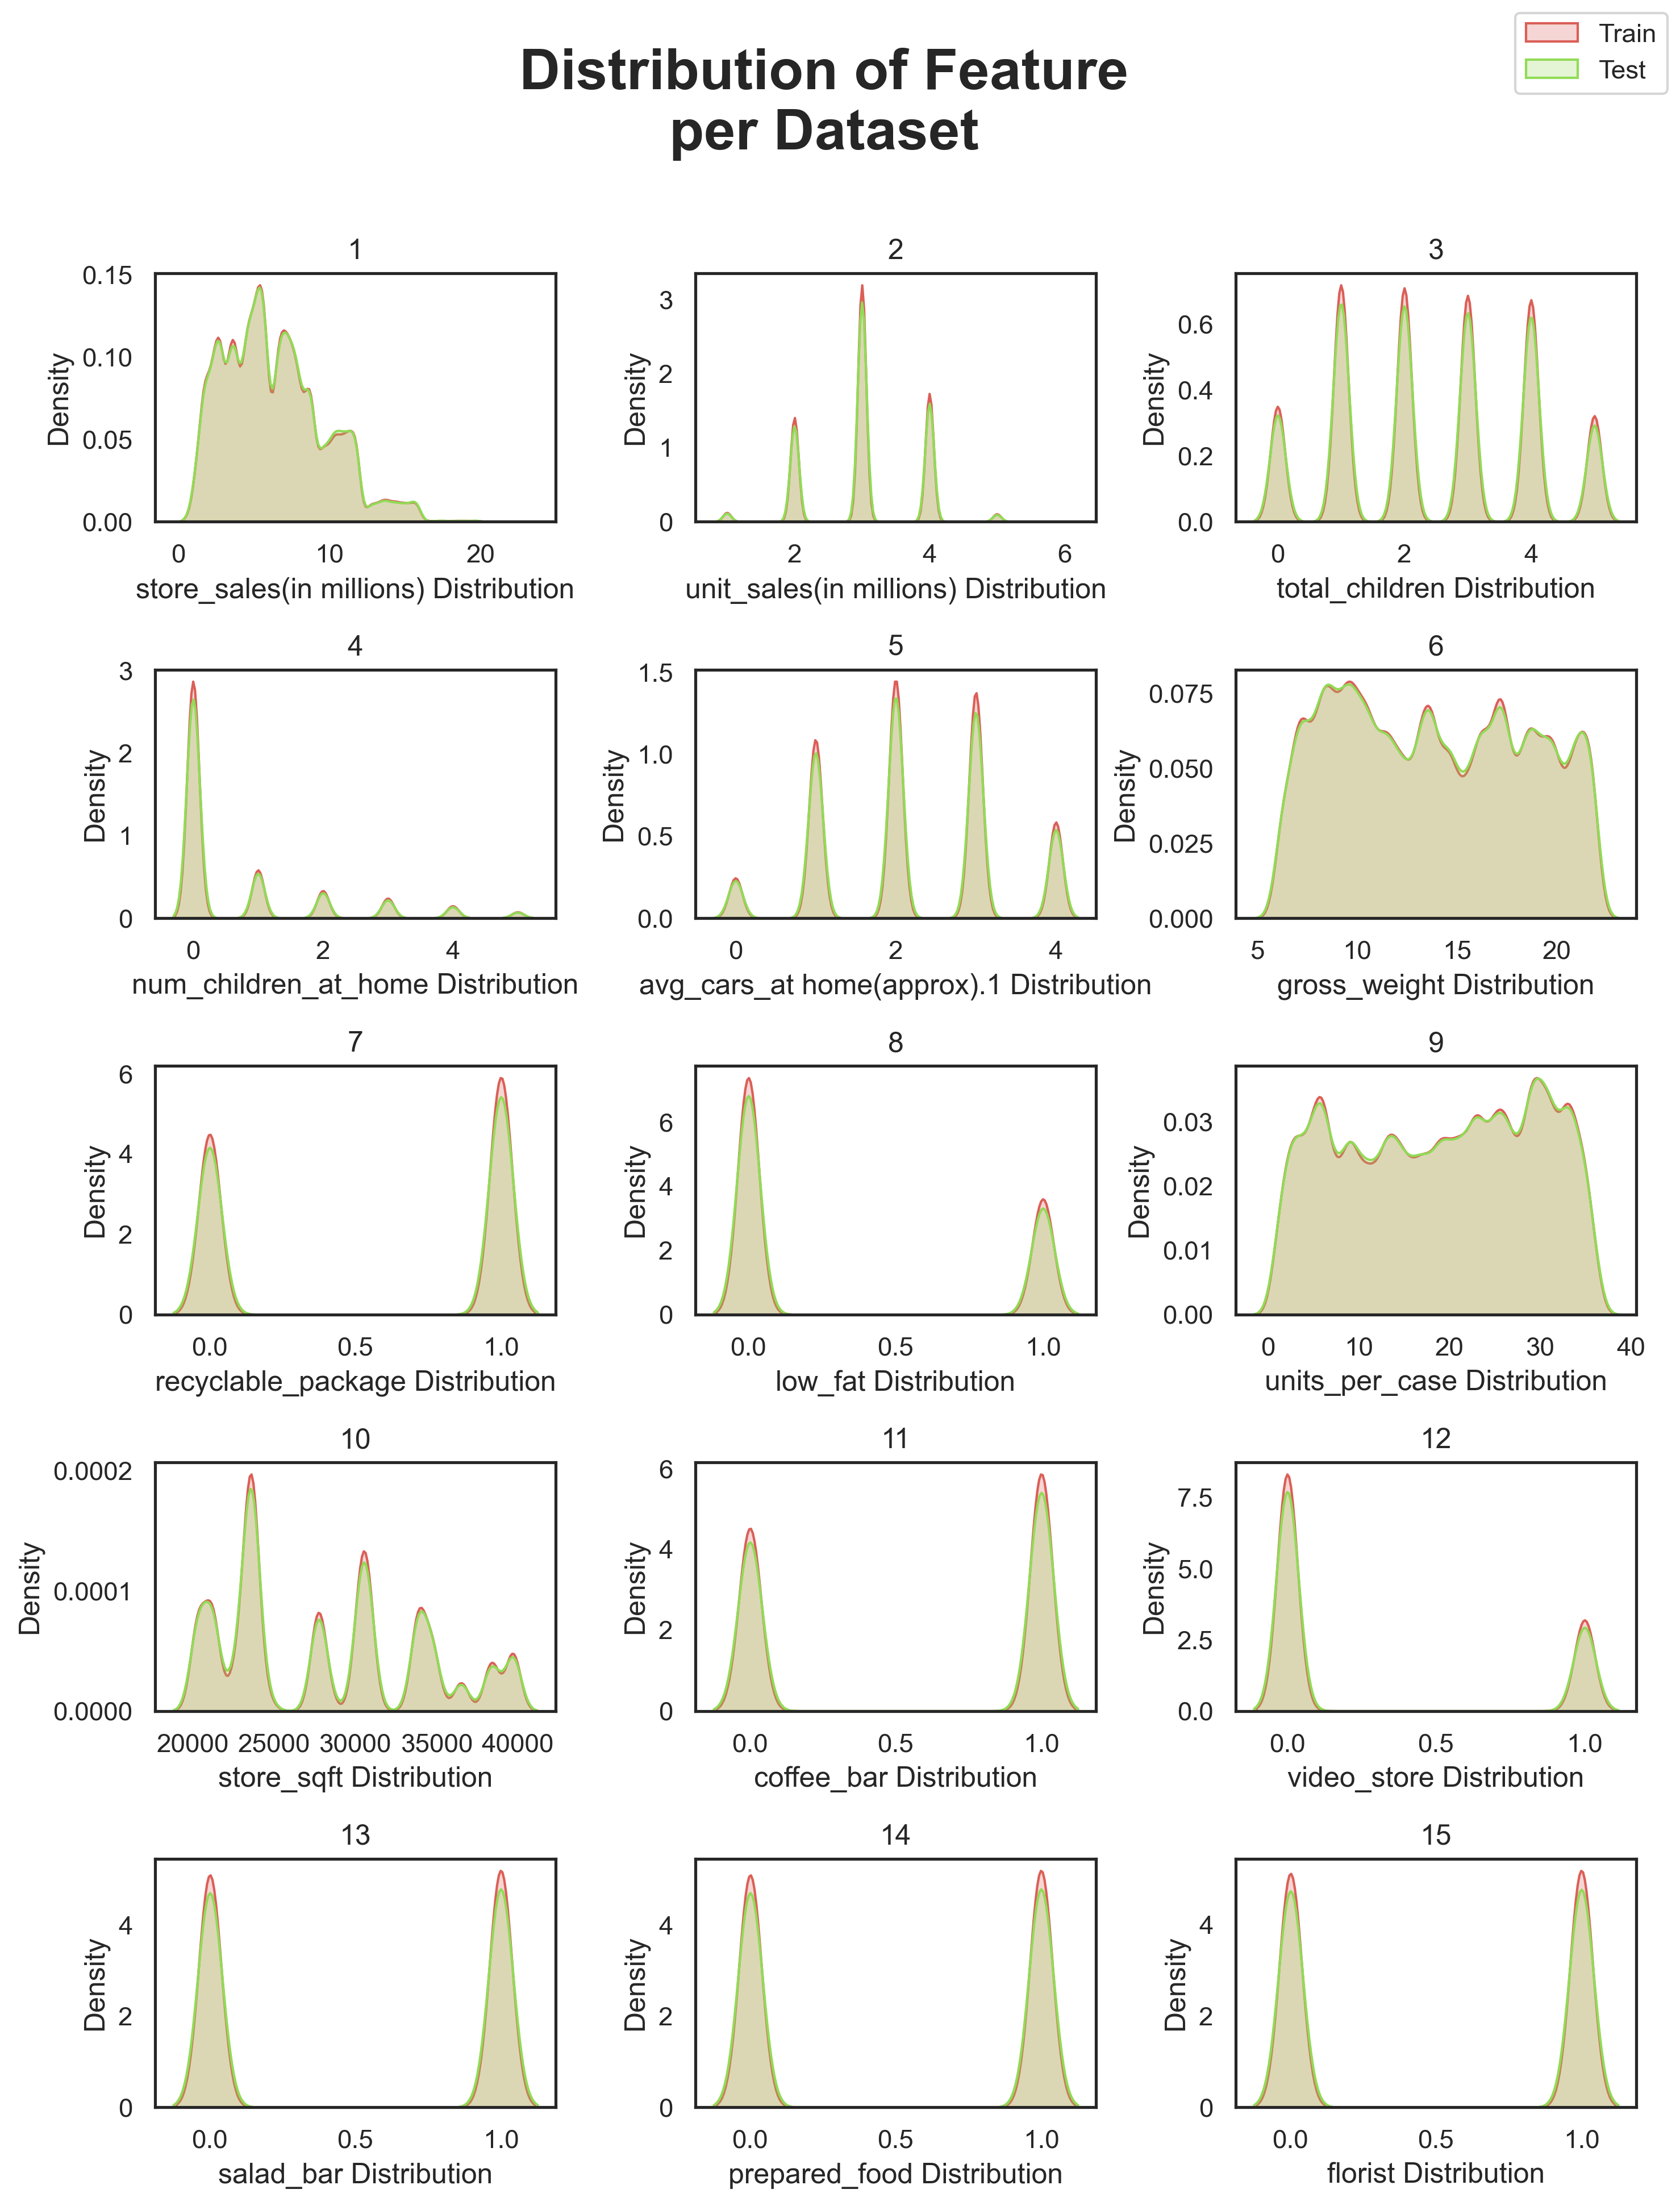

In [12]:
fig, ax = plt.subplots(5, 3, figsize = (10, 13), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_df.columns):
    sns.kdeplot(train_df[column], ax=ax[i], color=pal[0], fill = True)    
    sns.kdeplot(test_df[column], ax=ax[i], color=pal[2], fill = True)

    
    ax[i].set_title(i+1)
    ax[i].set_xlabel(f'{column} Distribution')
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

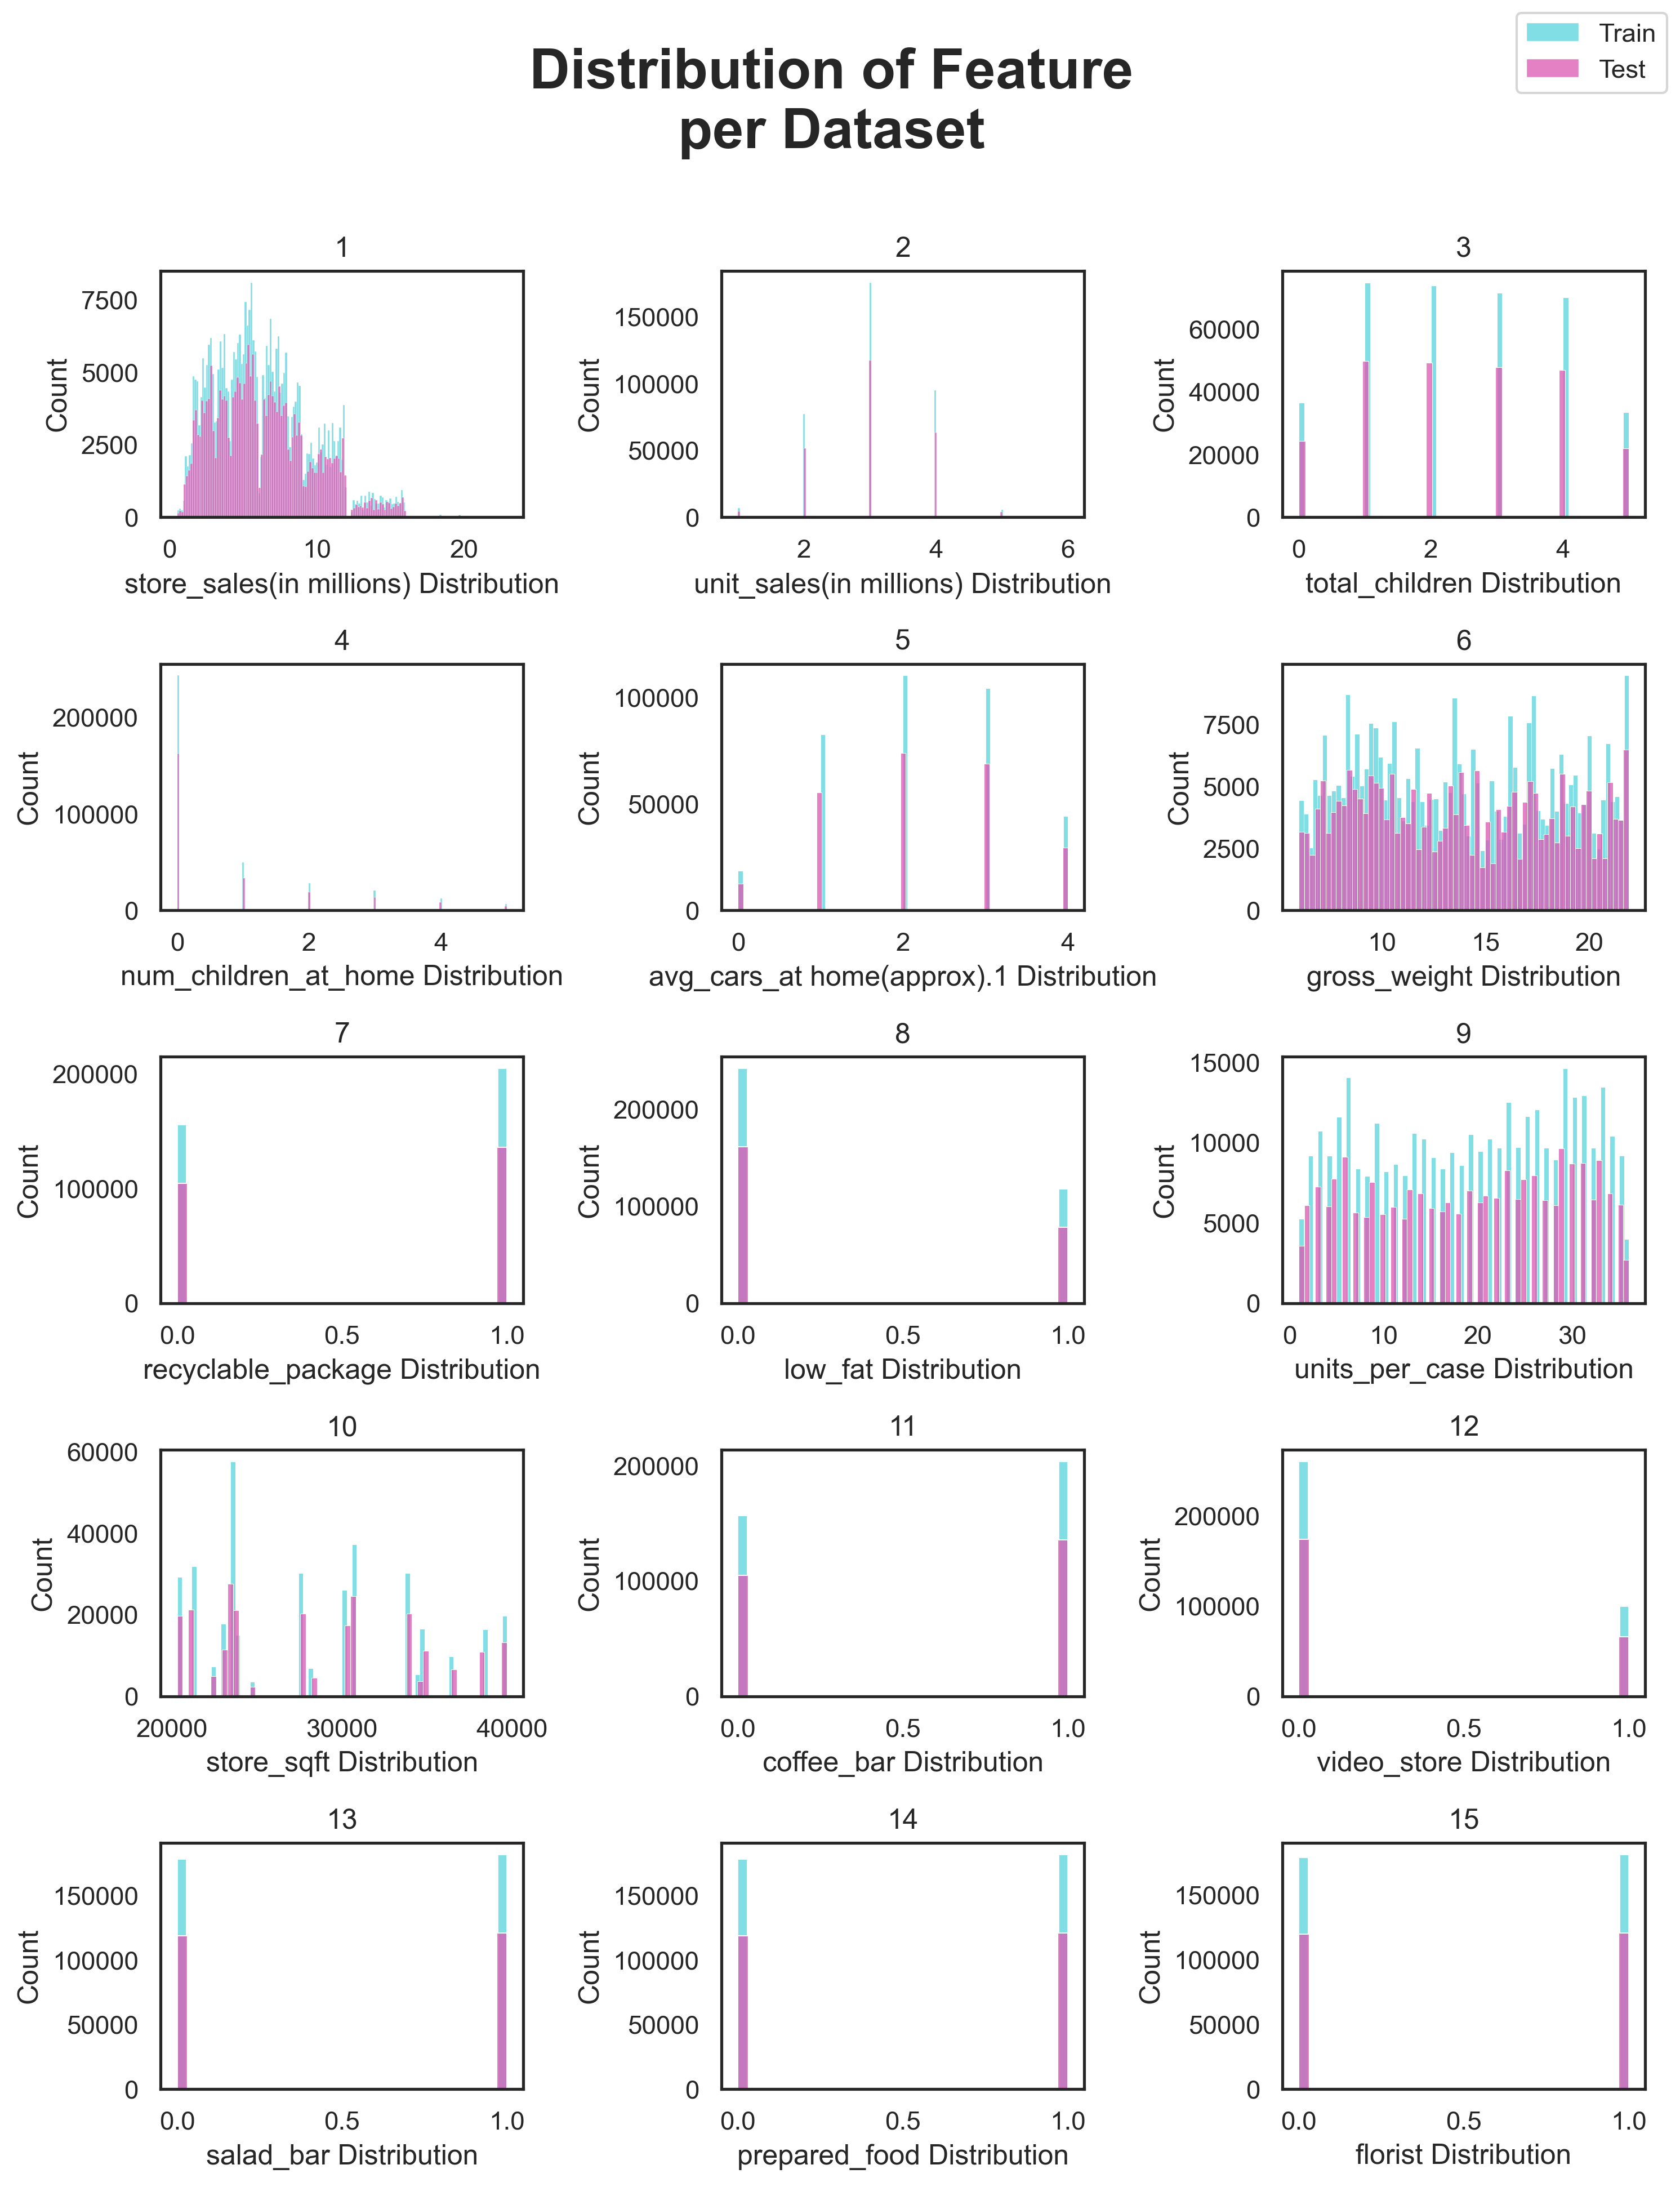

In [13]:
fig, ax = plt.subplots(5, 3, figsize = (10, 13), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_df.columns):
    sns.histplot(train_df[column], ax=ax[i], color=pal[4], fill = True)    
    sns.histplot(test_df[column], ax=ax[i], color=pal[7], fill = True)

    
    ax[i].set_title(i+1)
    ax[i].set_xlabel(f'{column} Distribution')
    
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

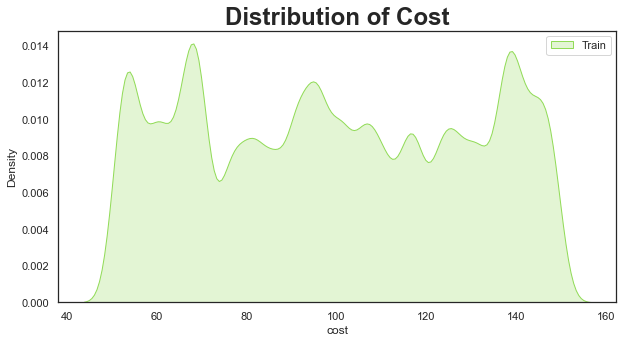

In [32]:
plt.figure (figsize = (10,5))

sns.kdeplot(train_df['cost'], color = pal[2], fill = True)

plt.title('Distribution of Cost', weight = 'bold', fontsize = 24)
plt.legend(['Train'])
plt.show()

Categorical and Continuous Distribution

In [27]:
categorical = ["unit_sales(in millions)", "total_children", "num_children_at_home", "avg_cars_at home(approx).1"]
continuous = ["store_sales(in millions)", "gross_weight", "units_per_case", "store_sqft"]
binary = ["recyclable_package", "low_fat", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist"]

categorical.extend(binary)

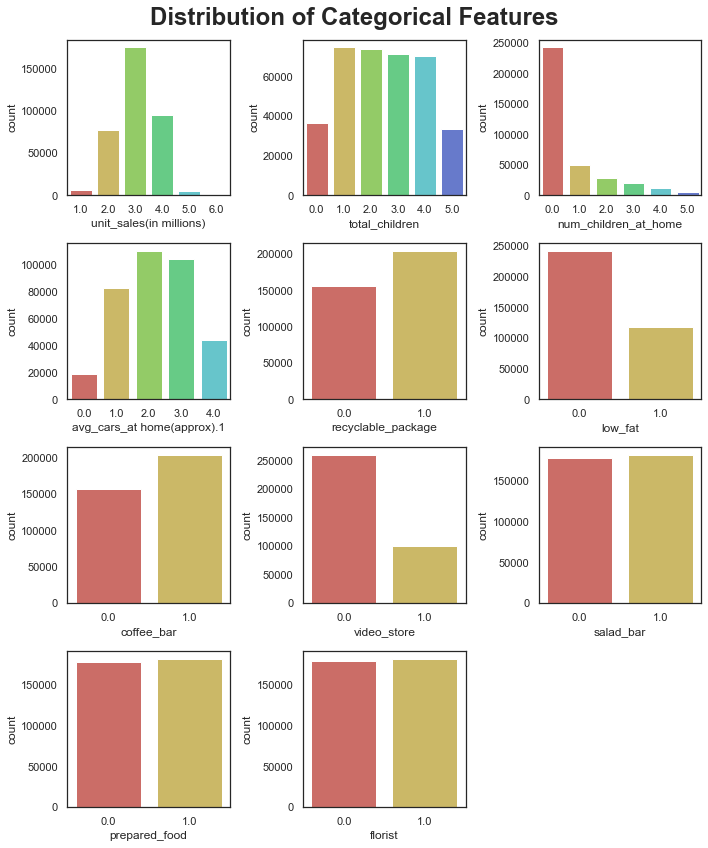

In [34]:
fig = plt.figure(figsize = (10,12))

for i, features in enumerate(categorical):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(x=features, data=train_df, palette=pal, ax=ax)

fig.suptitle('Distribution of Categorical Features', fontweight = 'bold', fontsize = 24)
fig.tight_layout()


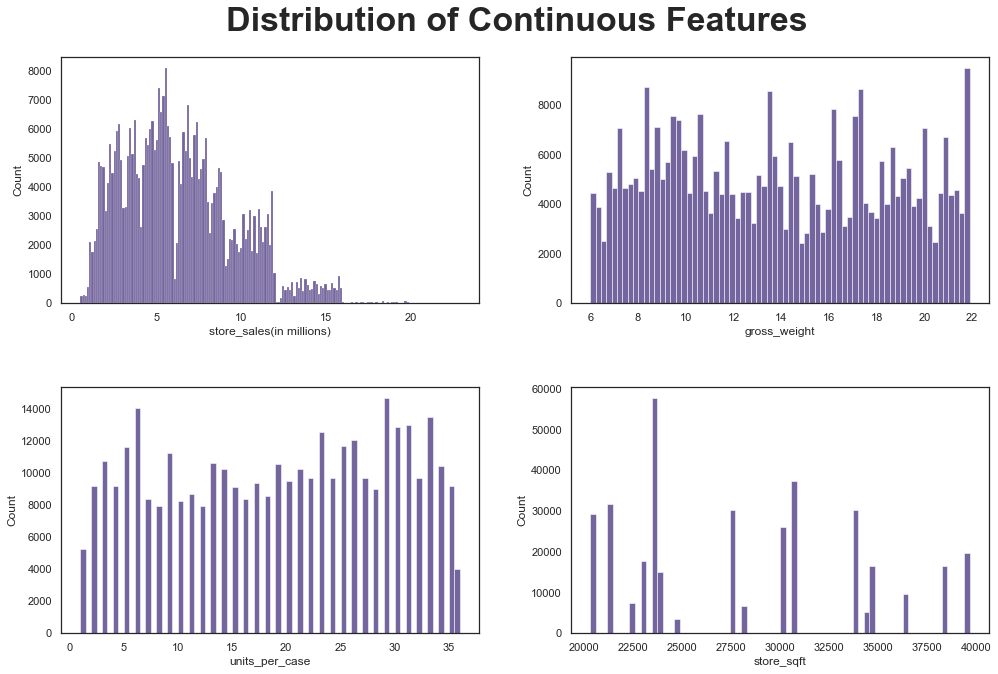

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.tight_layout(pad=5)

# Create a countplot to evaluate the distribution
for i, feature in enumerate(continuous):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(x=feature, data=train_df, ax=ax)

fig.suptitle('Distribution of Continuous Features', fontweight = 'bold', fontsize = 34)
plt.show()

Distribution of the Target Variable

In [45]:
val_unique = len(train_df["cost"].unique())
max = train_df['cost'].max()
min = train_df["cost"].min()
avg = train_df['cost'].mean()
median = train_df["cost"].median()
mode = train_df['cost'].mode().values[0]


In [46]:
print("Unique values:", val_unique)
print("Max value:", max)
print("Min value:", min)
print("Average value:", avg)
print("Median value:", median)
print("Mode value:", mode)

Unique values: 328
Max value: 149.75
Min value: 50.79
Average value: 99.61472939135236
Median value: 98.81
Mode value: 101.84


Text(0.5, 0.98, 'Target Variable Distribution')

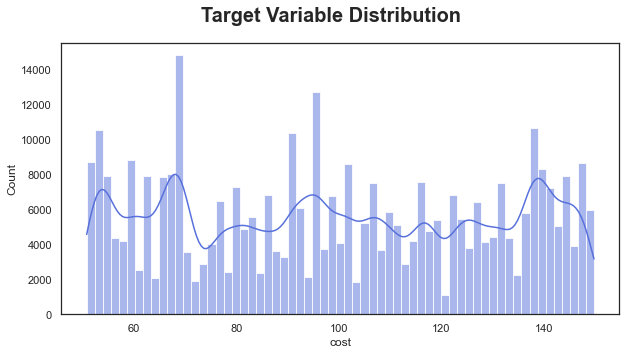

In [63]:
# plotting the target variable distribution 

fig = plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x="cost", kde=True, color=pal[5], alpha=0.5)

fig.suptitle("Target Variable Distribution", fontweight = "bold", fontsize = 20)

Correlation

In [ ]:
def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, annot = True, annot_kws = {'size' : 7}, cmap = pal)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

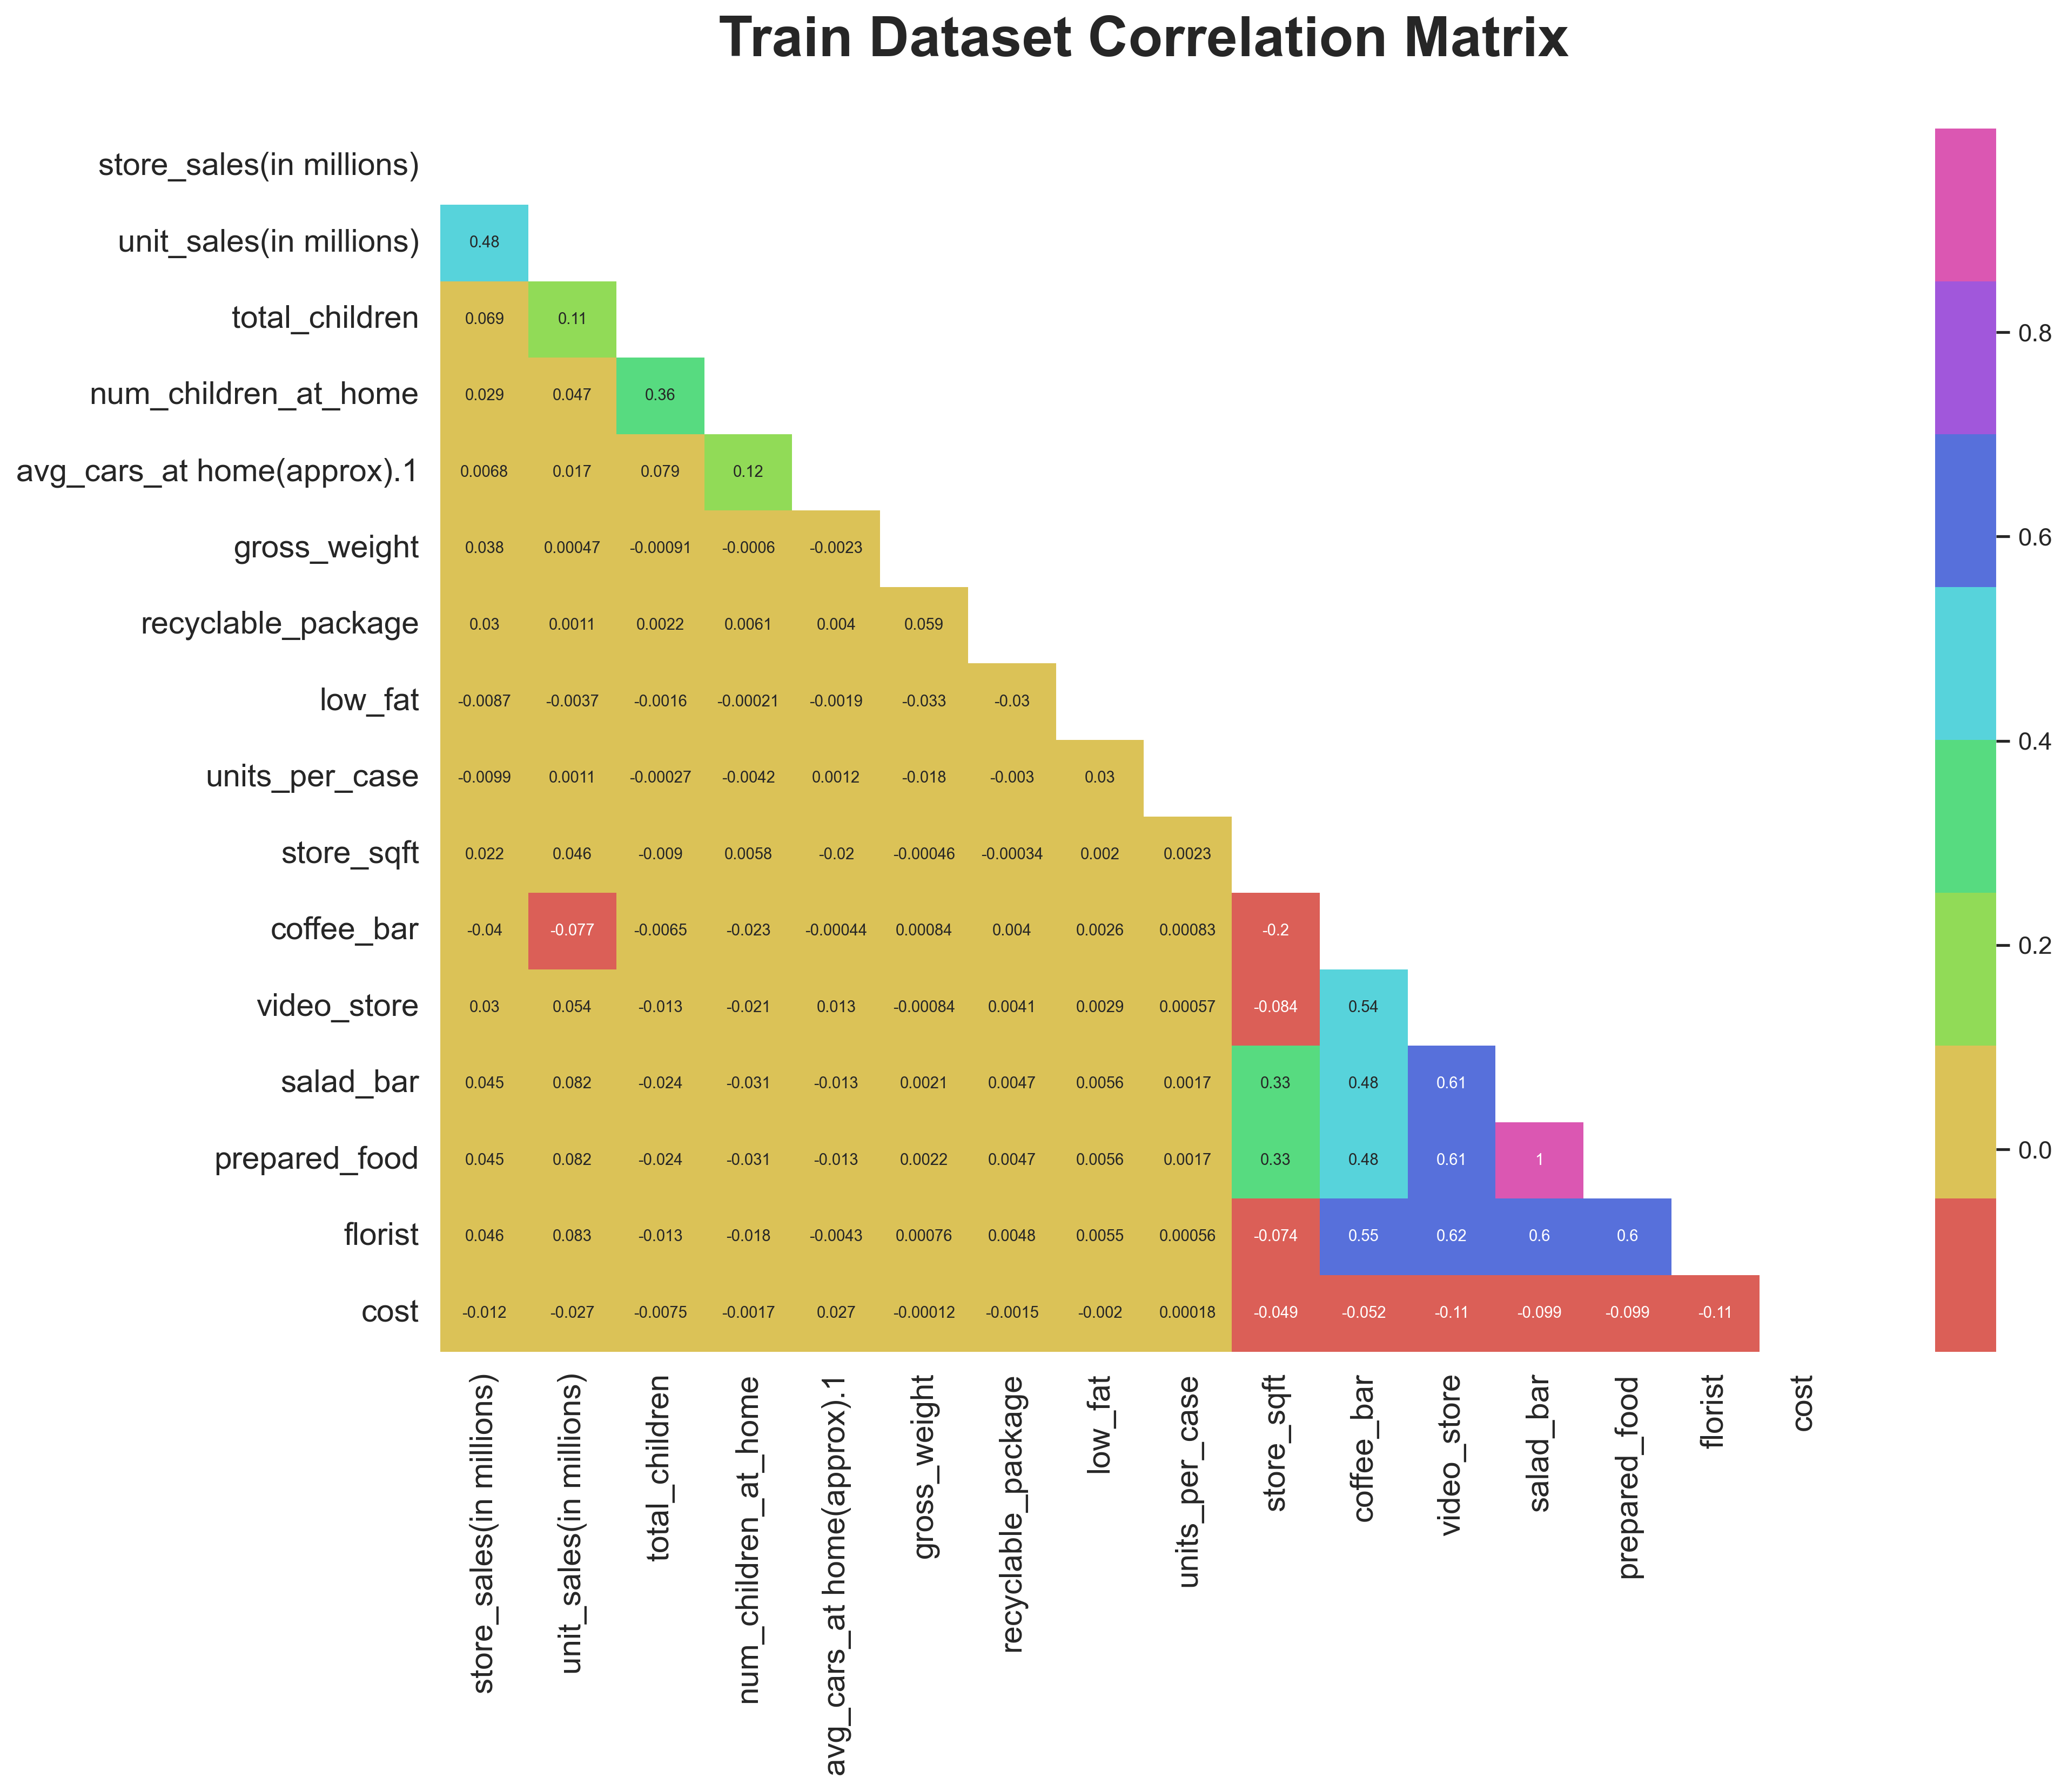

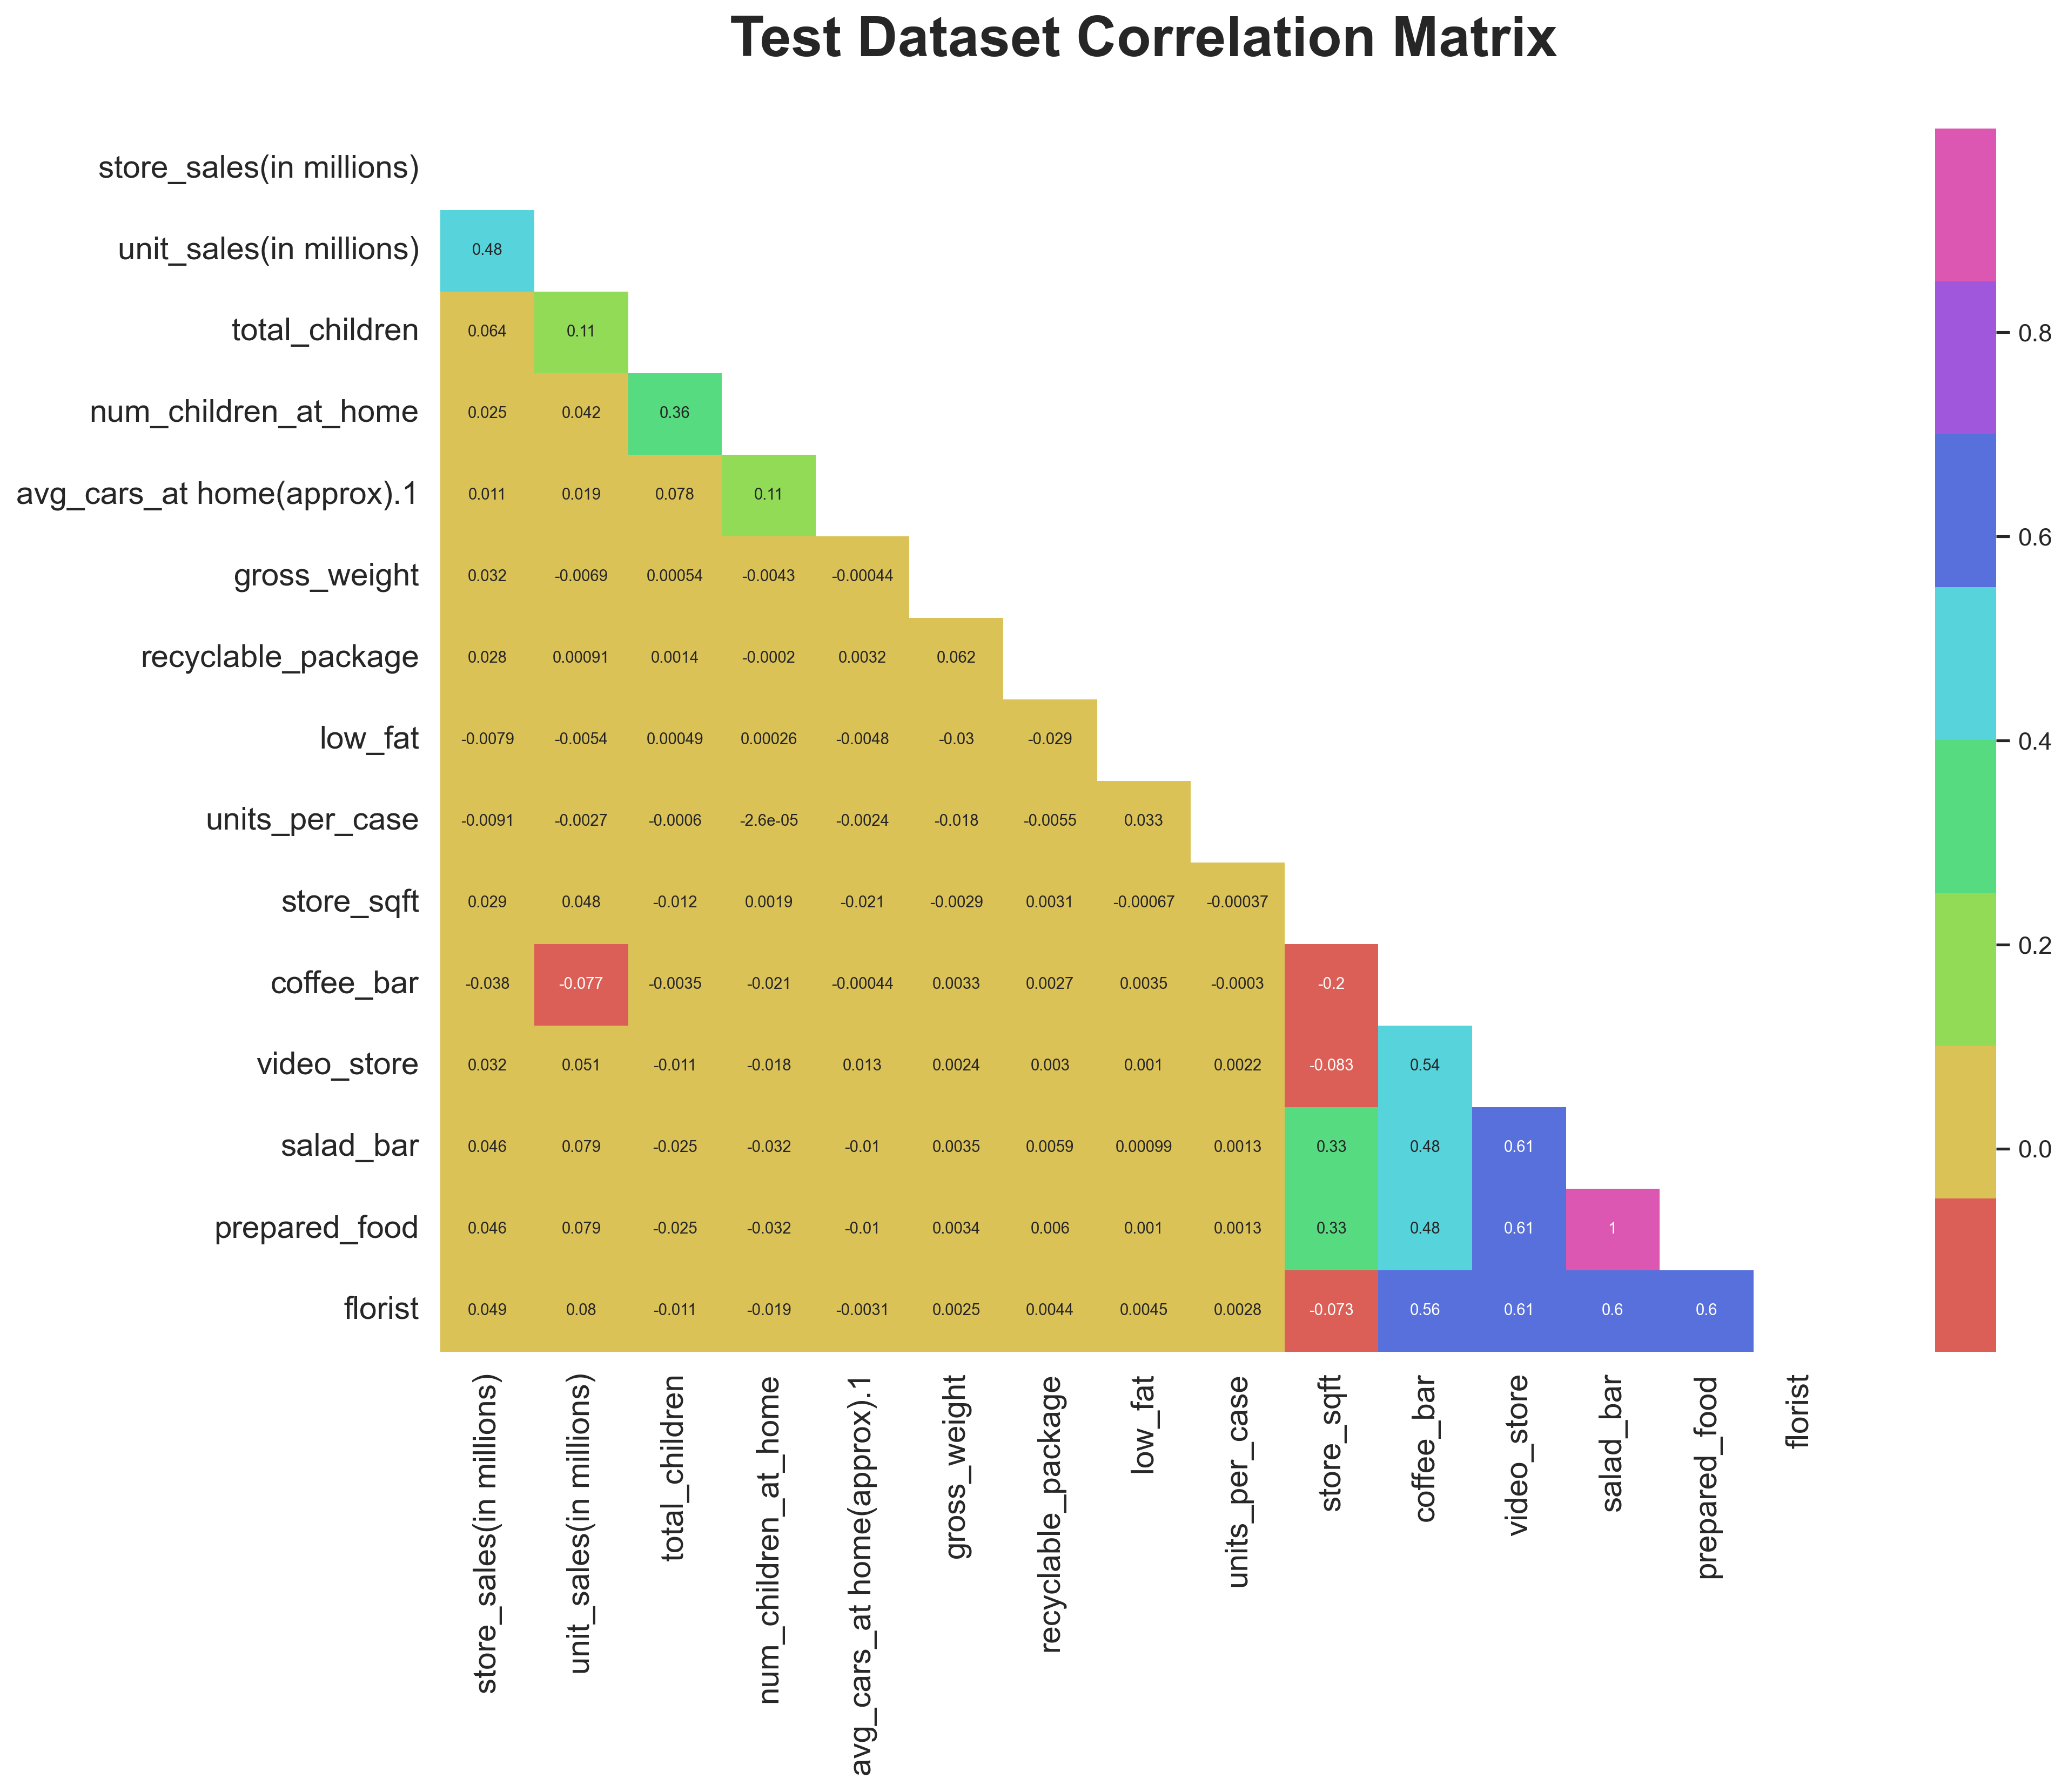

In [ ]:

heatmap(train_df, 'Train')
heatmap(test_df, 'Test')